In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/the-wildfire-dataset


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Model


In [3]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0],True)
  print('GPU is used')
else:
  print('GPU is unavailable')

GPU is used


In [4]:
train_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train'
val_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/val'
test_dir='/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test'

In [5]:
classes=os.listdir(train_dir)
num_classes=len(classes)
print(f'number of classes:{num_classes}')
print(f'classes:{classes}')

number of classes:2
classes:['nofire', 'fire']


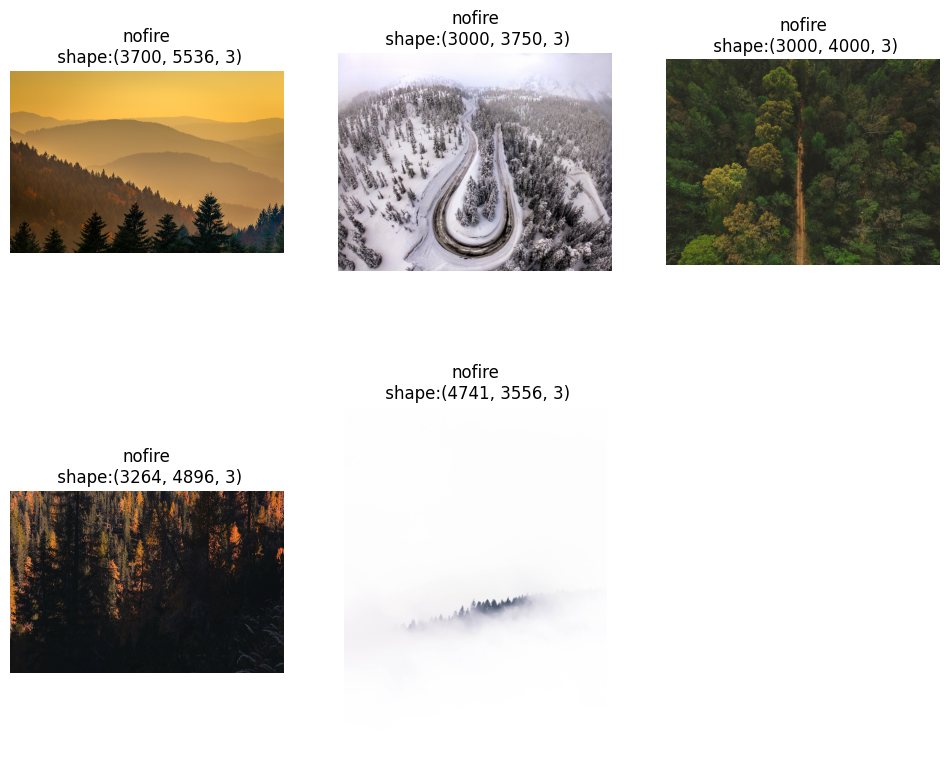

In [6]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(2,3,i+1)
  plt.imshow(img)
  plt.title(f'{classes[0]}\n shape:{img.shape}')
  plt.axis('off')
plt.show()

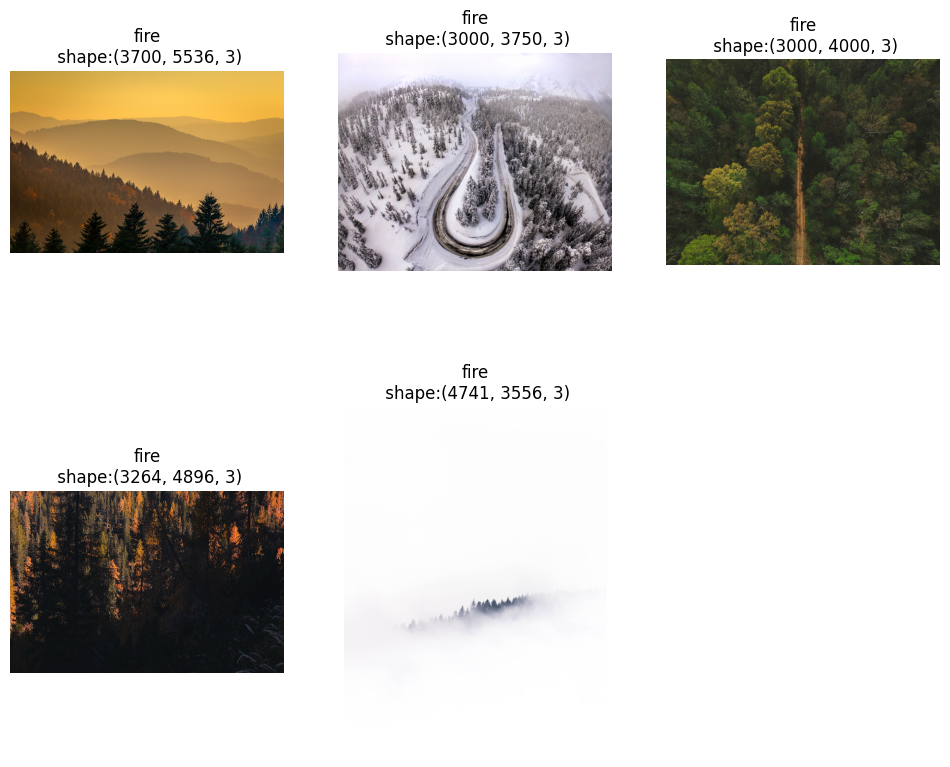

In [7]:
plt.figure(figsize=(12,10))
for i in range(5):
  class_path=os.path.join(train_dir,classes[0])
  img_name=os.listdir(class_path)[i]
  img_path=os.path.join(class_path,img_name)
  img=plt.imread(img_path)
  plt.subplot(2,3,i+1)
  plt.imshow(img)
  plt.title(f'{classes[1]}\n shape:{img.shape}')
  plt.axis('off')
plt.show()

In [8]:
img_width,img_height=150,150
batch_size=32
train_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
    train_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',shuffle=True
)
val_generator=val_datagen.flow_from_directory(
    val_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',shuffle=True
)
test_generator=test_datagen.flow_from_directory(
    test_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',shuffle=True
)

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.
Found 410 images belonging to 2 classes.


In [9]:
class_mapping=train_generator.class_indices
print(class_mapping)
class_names=list(class_mapping.keys())
print("classnames:",class_names)

{'fire': 0, 'nofire': 1}
classnames: ['fire', 'nofire']


In [10]:
model=Sequential([
    Input(shape=(img_width,img_height,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')

])

In [11]:
model.compile(optimizer='adam',
               loss='binary_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs = 12,
    validation_data=val_generator,
    validation_steps = val_generator.samples // batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
19/58 ━━━━━━━━━━━━━━━━━━━━ 3:58 6s/step - accuracy: 0.4781 - loss: 1.1035

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (104688771 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


20/58 ━━━━━━━━━━━━━━━━━━━━ 3:59 6s/step - accuracy: 0.4809 - loss: 1.0906

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (89747104 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


30/58 ━━━━━━━━━━━━━━━━━━━━ 3:05 7s/step - accuracy: 0.5009 - loss: 0.9966

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test Accuracy: {test_acc:.4f}')

In [ ]:
model.save('FFD.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('FFD.keras')
def predict_fire(img_path):
  img = image.load_img(img_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0
  prediction = model.predict(img_array)
   if prediction[0] > 0.5:
     predicted_class = class_names[1]
   else:
      predicted_class = class_names[0]
   plt.imshow(img)
   plt.title(f'Predicted: {predicted_class}')
   plt.axis('off')
   plt.show()

In [ ]:
os.listdir('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire')

In [ ]:
predict_fire('/kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire//kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/test/nofire/35554264024_b33afa21ac_o.jpg')